
***Dataset***

The dataset consists of feature vectors belonging to **12,330 sessions**.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

The dataset consists of **10** **numerical** and **8** categorical attributes.
The '***Revenue***' attribute can be used as the class label.

Additional informations about the dataset such as how the data collected, can be found on the following URL:
http://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

In [142]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings('ignore')

In [143]:
data = pd.read_csv("online_shoppers_intention.csv")

# Data Exploration

In [144]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [145]:
data["Revenue"].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

We checked unique values of each feature to get better understanding of features type.

In [147]:
number_of_unique_values = []

for col in data.columns:
    number_of_unique_values.append(data[col].unique().size)

unique_values_df = pd.DataFrame({"Columns": data.columns,
                                 "Unique Values": number_of_unique_values})
print(unique_values_df)

                    Columns  Unique Values
0            Administrative             27
1   Administrative_Duration           3335
2             Informational             17
3    Informational_Duration           1258
4            ProductRelated            311
5   ProductRelated_Duration           9551
6               BounceRates           1872
7                 ExitRates           4777
8                PageValues           2704
9                SpecialDay              6
10                    Month             10
11         OperatingSystems              8
12                  Browser             13
13                   Region              9
14              TrafficType             20
15              VisitorType              3
16                  Weekend              2
17                  Revenue              2


We assigned appropriate types to features.

In [148]:
data.VisitorType = data.VisitorType.astype("category")
data.TrafficType = data.TrafficType.astype("category")
data.Region = data.Region.astype("category")
data.Browser = data.Browser.astype("category")
data.OperatingSystems = data.OperatingSystems.astype("category")
data.Month = data.Month.astype("category")
data.SpecialDay = data.SpecialDay.astype("category")

data.Weekend = data.Weekend.astype("int")
data.Revenue = data.Revenue.astype("int")

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  category
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

## Missing Value Examination

<AxesSubplot:>

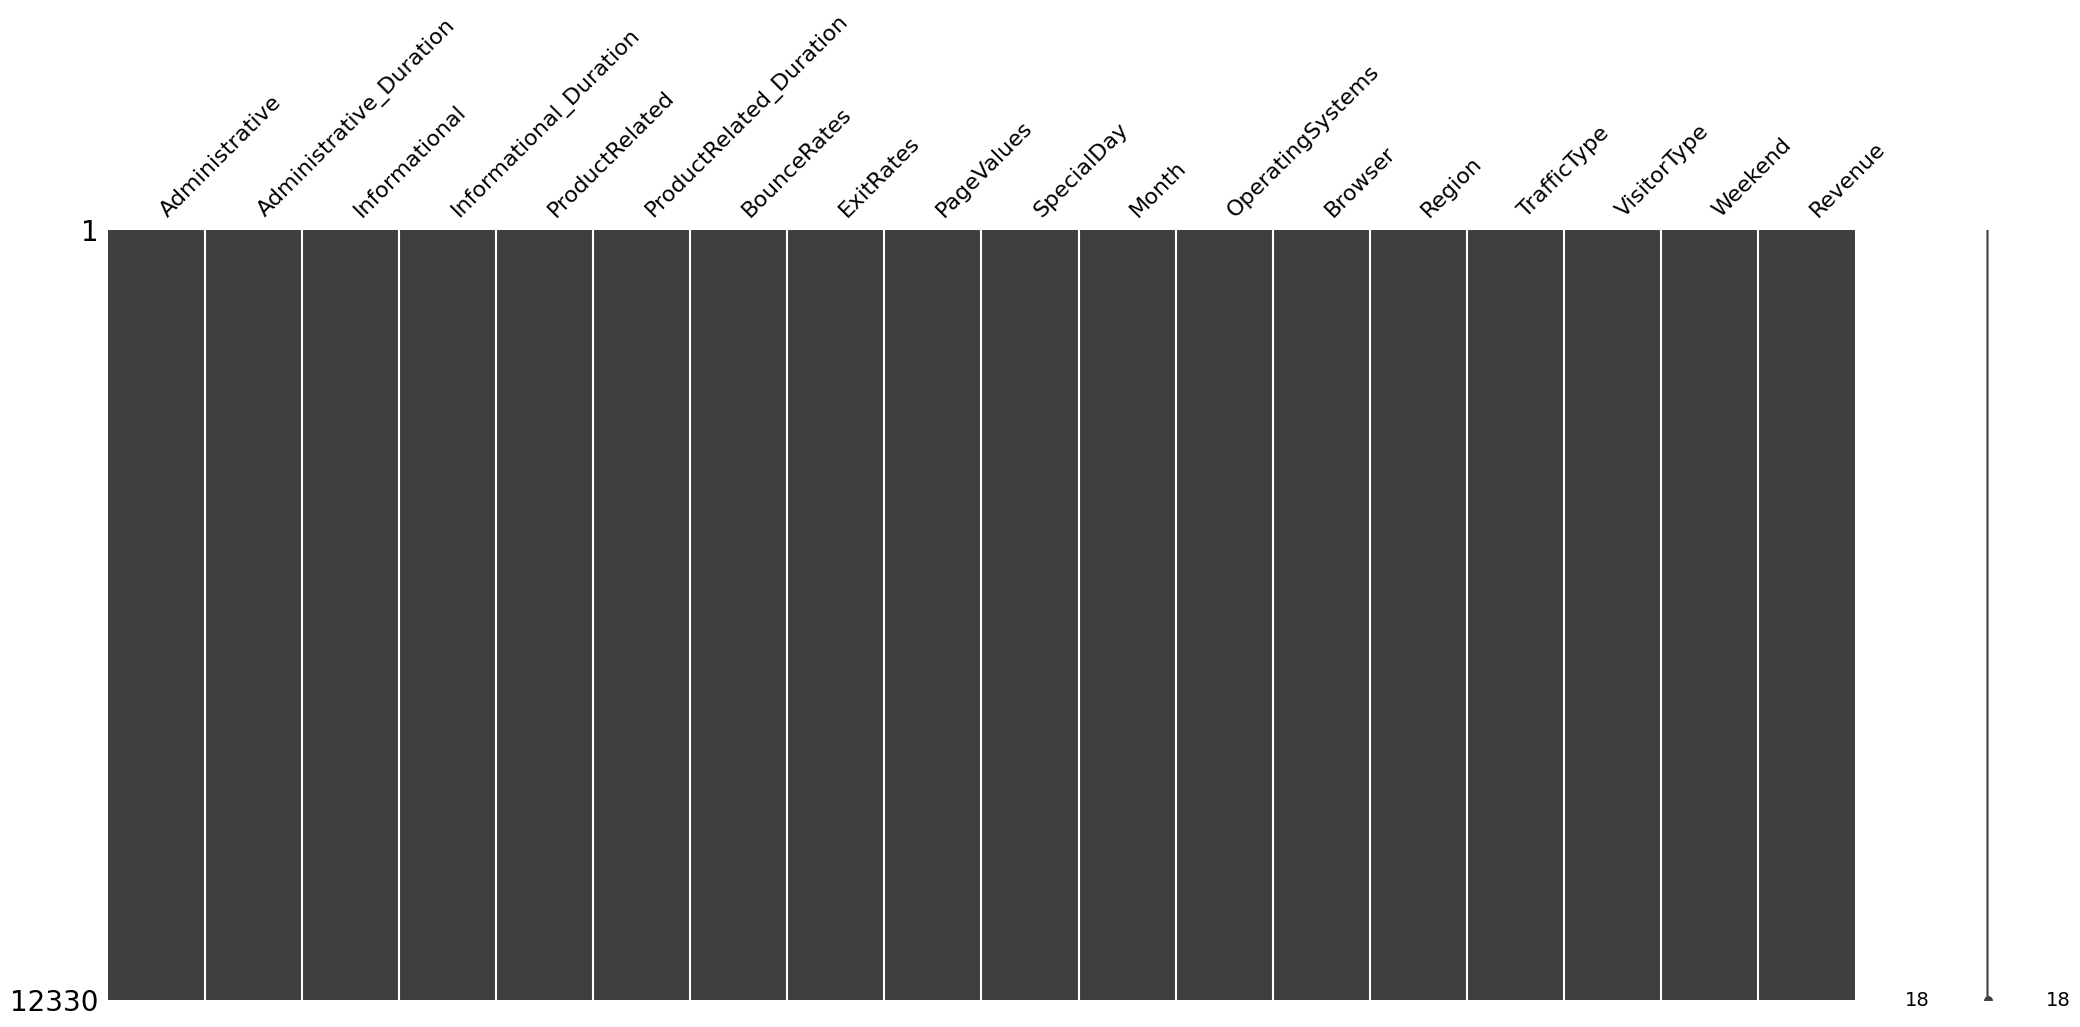

In [150]:
msno.matrix(data)

As you can see there is not any missing values in the dataset.

# Data Visualization

<AxesSubplot:>

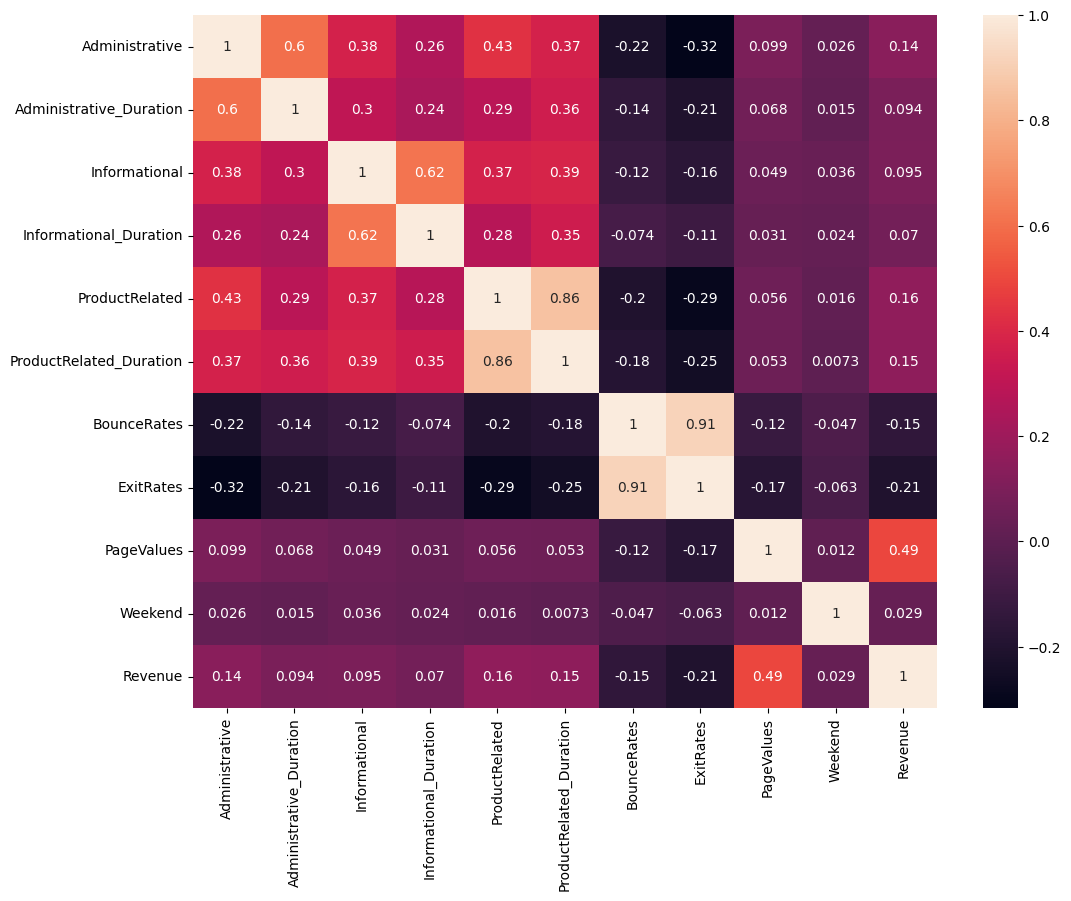

In [151]:
corr = data.corr()
f, ax = plt.subplots(figsize= (12,9))
sns.heatmap(corr, annot= True)

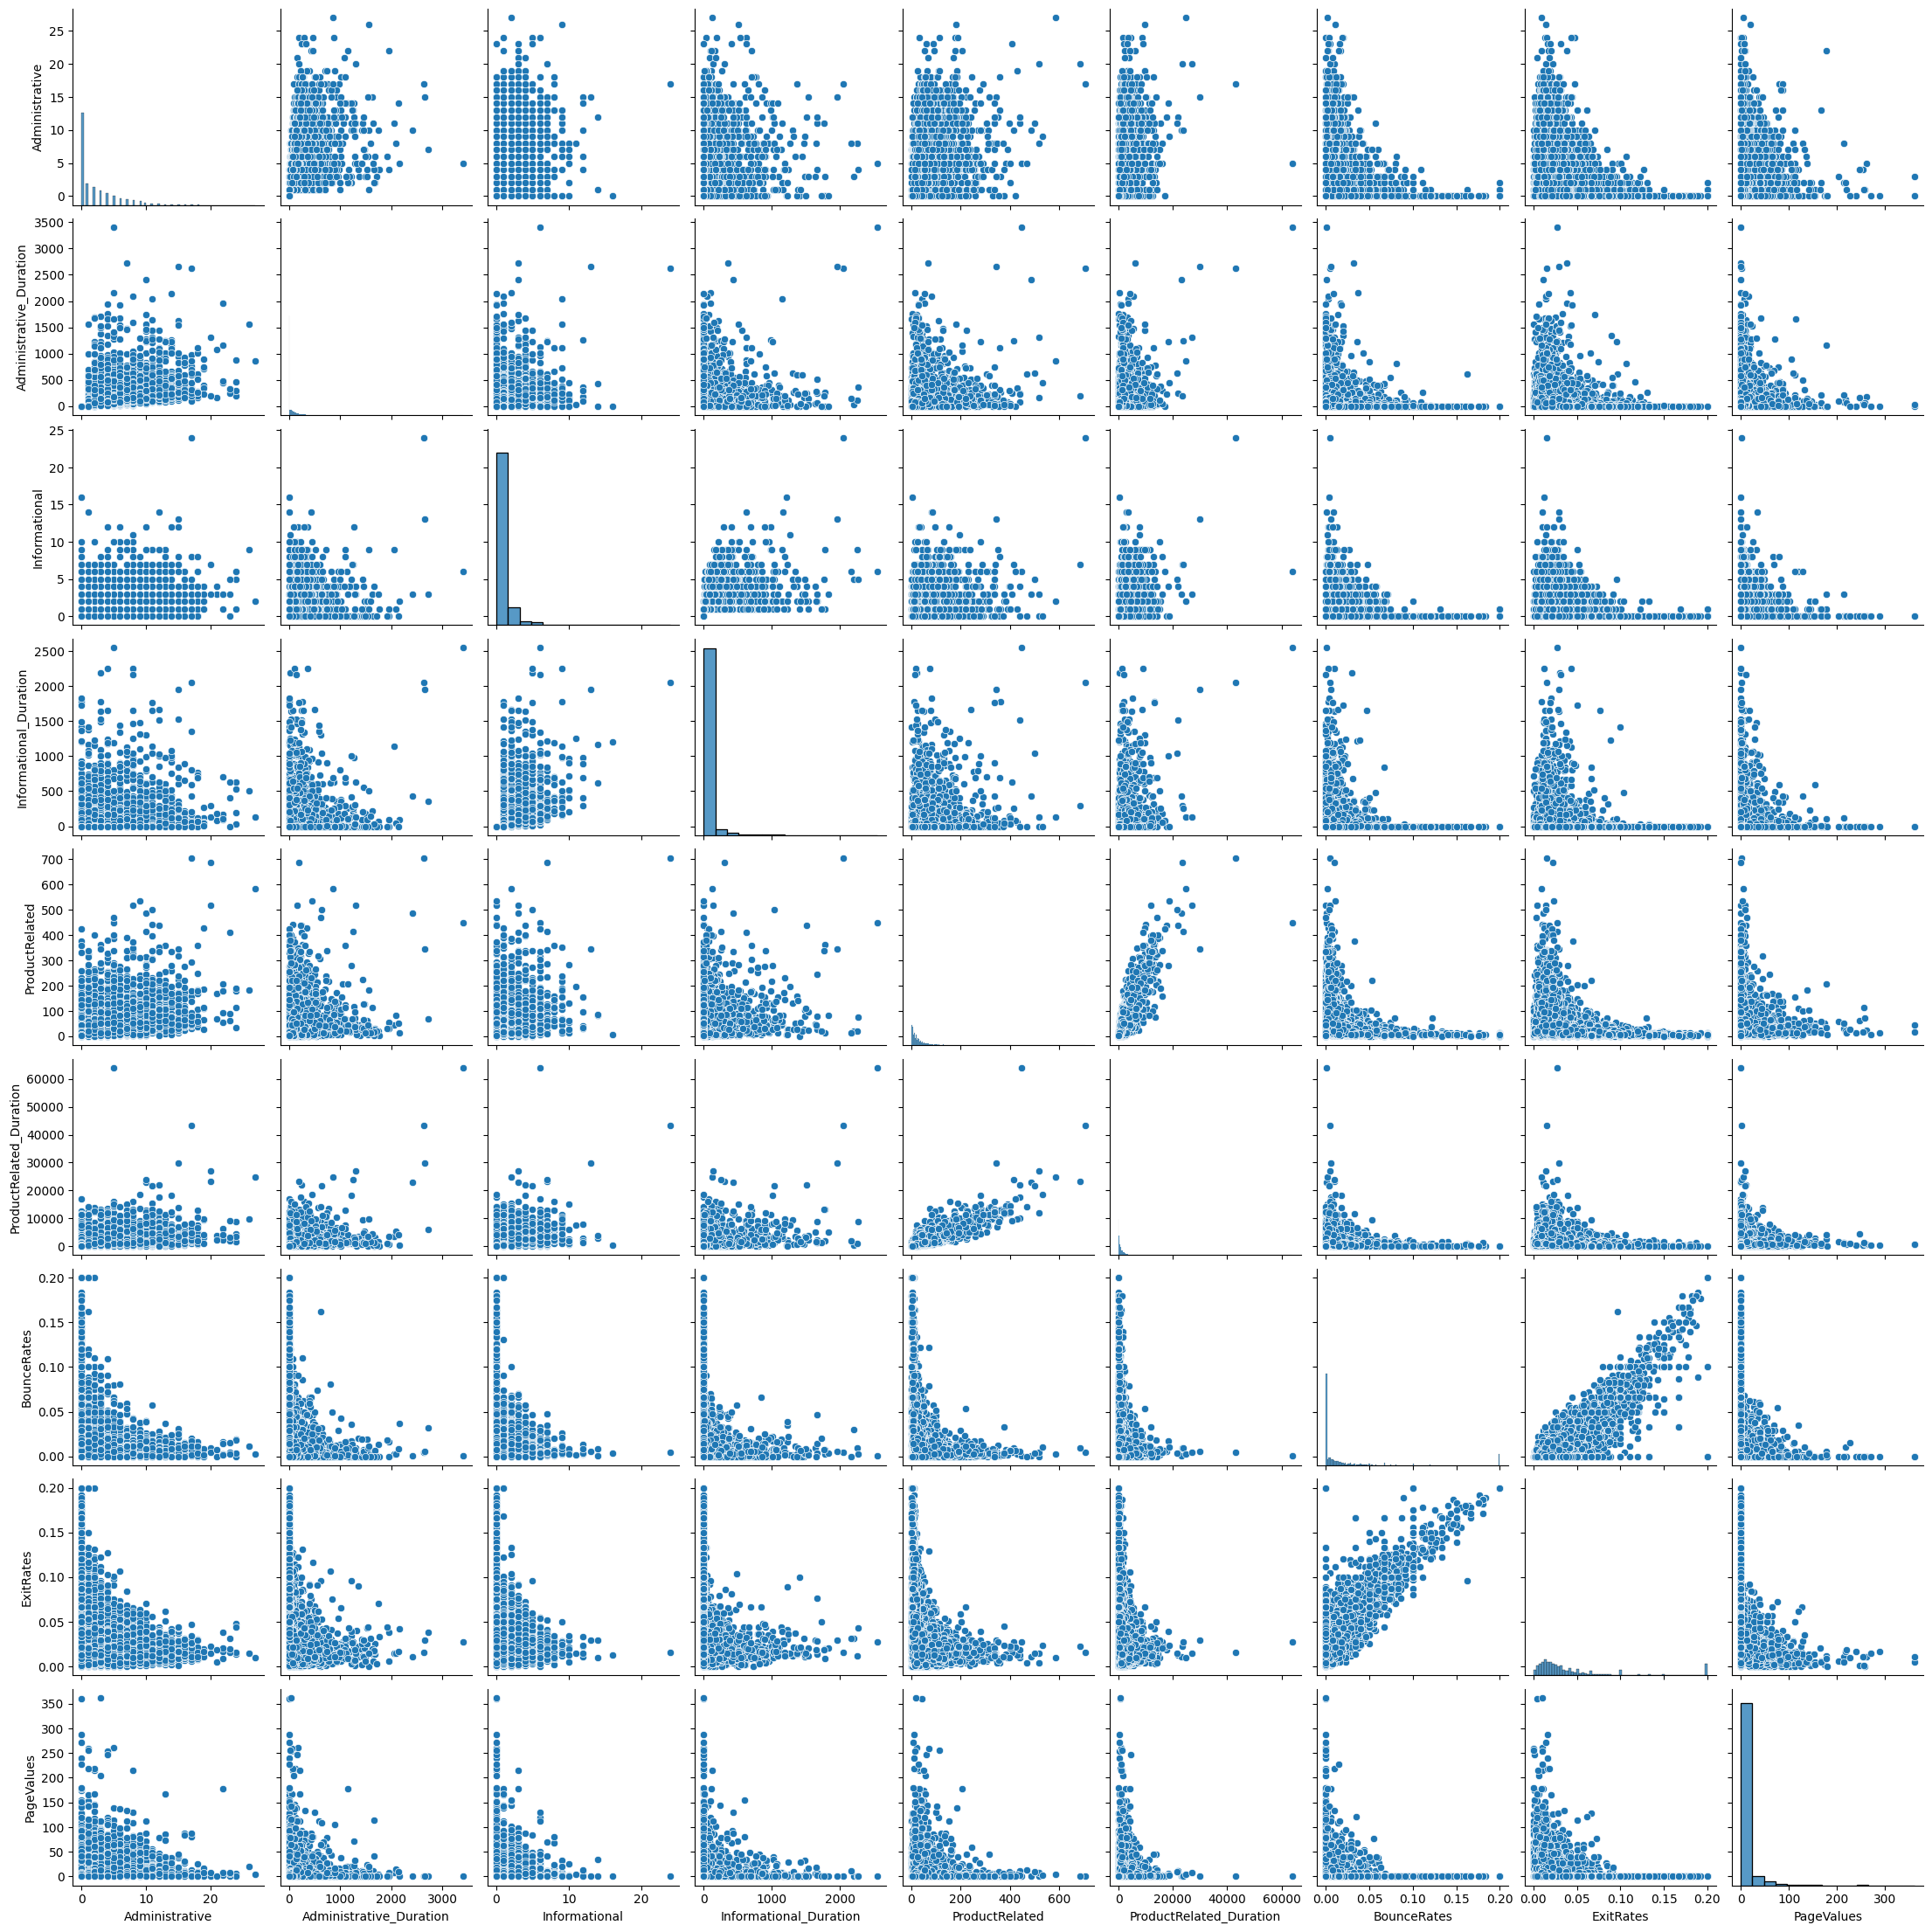

In [152]:
sns.pairplot(data.iloc[:,:-2]);

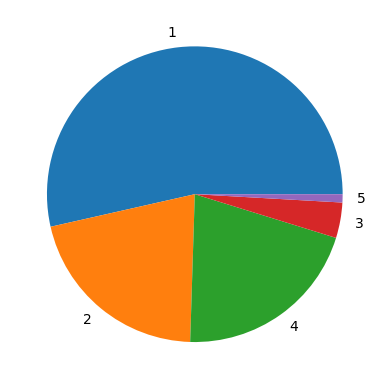

In [153]:
data["OperatingSystems"] = data["OperatingSystems"].replace([5,6,7,8],5)
plt.pie(x= data["OperatingSystems"].value_counts(), labels= data["OperatingSystems"].unique());

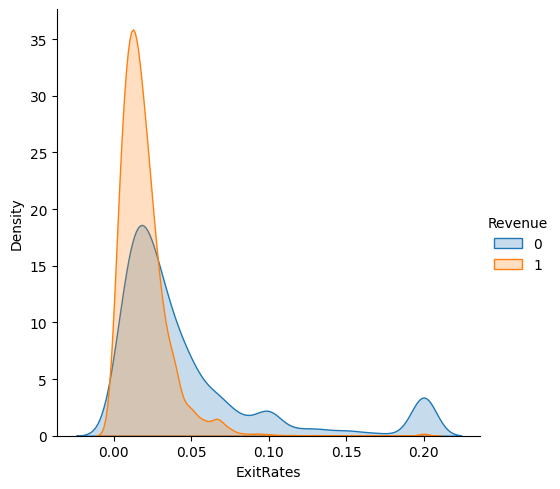

In [154]:
sns.FacetGrid(data, hue= "Revenue", height= 5,).map(sns.kdeplot, "ExitRates", shade= True).add_legend();

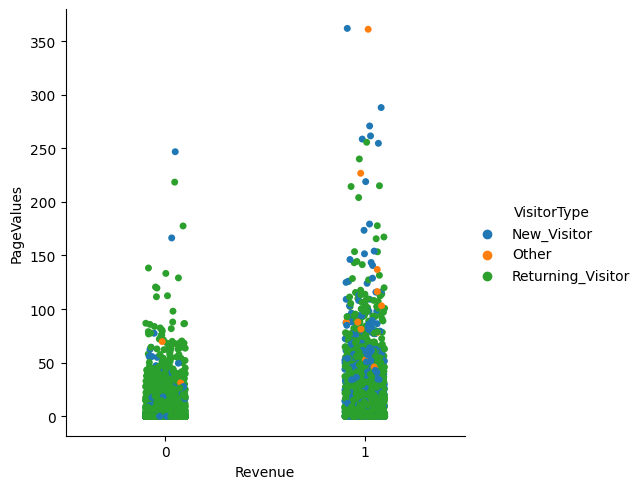

In [155]:
sns.catplot(data= data, x= "Revenue", y= "PageValues", hue= "VisitorType")

<AxesSubplot:xlabel='Revenue', ylabel='SpecialDay'>

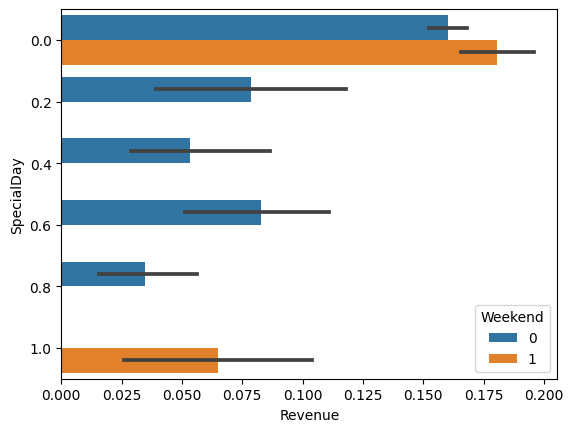

In [156]:
sns.barplot(data=data, x= data["Revenue"], y=data["SpecialDay"], hue = data["Weekend"])

## Outlier Analysis

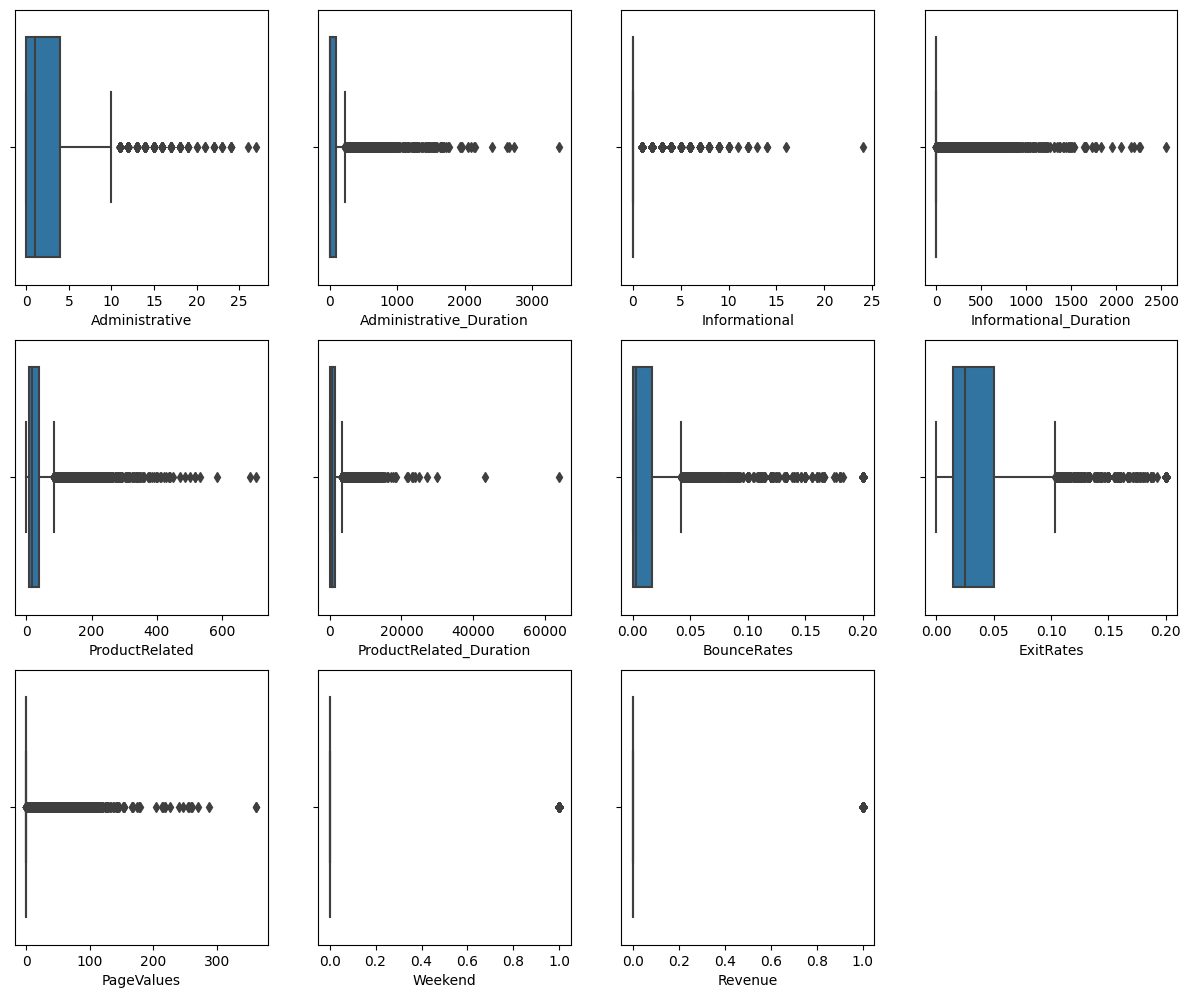

In [157]:
fig = plt.figure(figsize = (15,25))
for i, v in enumerate(data.select_dtypes(include=np.number)): 
    ax = fig.add_subplot(6,4, i+1) 
    sns.boxplot(x = data[v], ax = ax)

### Z-score for Outlier Removing

Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.
If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

In [158]:
data["Revenue"].count

<bound method Series.count of 0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int32>

In [159]:
threshold = 3

for col in data.select_dtypes(include= np.number):
    if col == "Weekend" or col == "Revenue":
        continue
    
    mean = np.mean(data[col])
    std = np.std(data[col])

    for i in range(len(data[col])):
        z = (data[col][i] - mean) / std
        if z > threshold:
            data[col][i] = np.median(data[col])

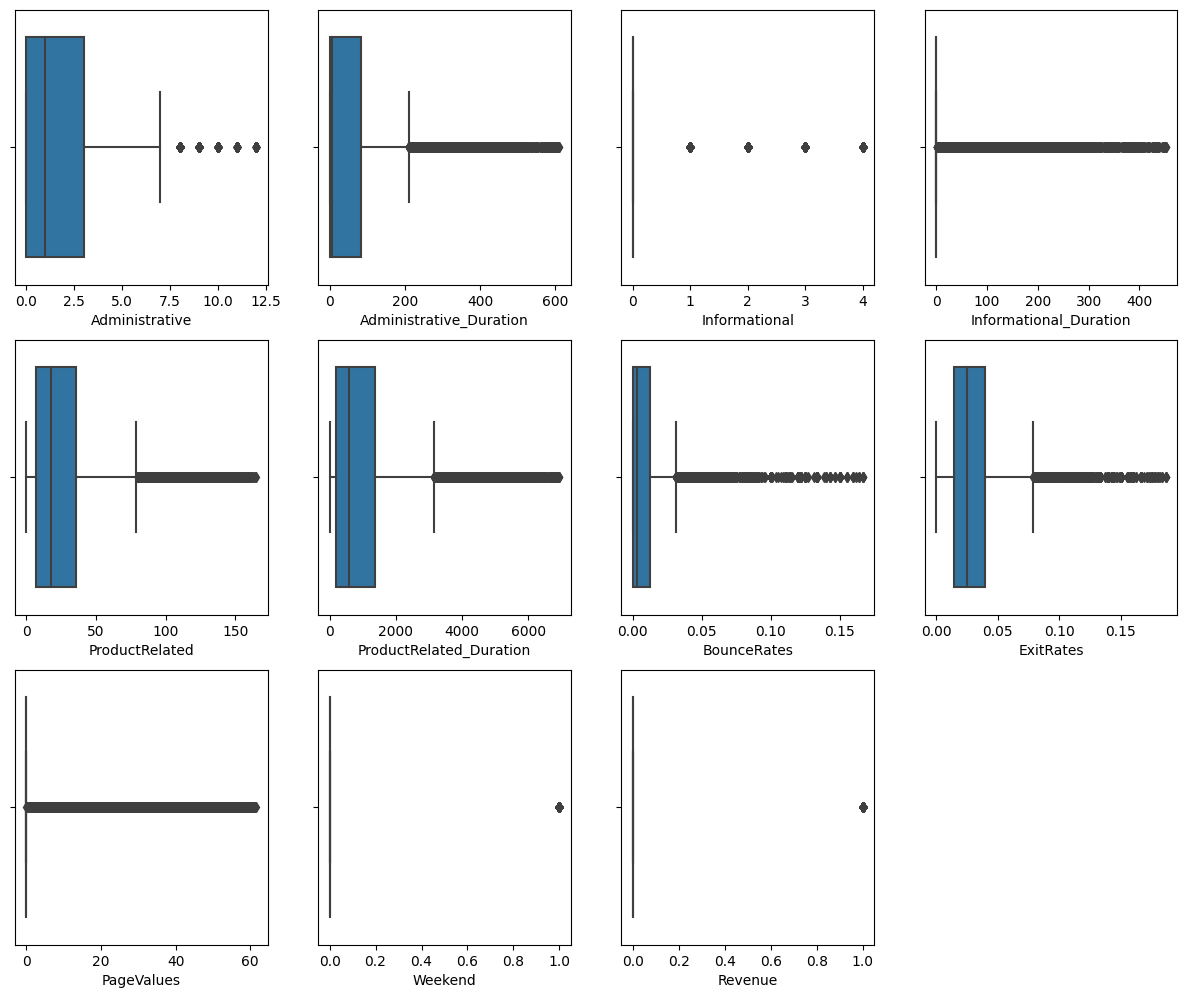

In [160]:
fig = plt.figure(figsize = (15,25))
for i, v in enumerate(data.select_dtypes(include=np.number)): 
    ax = fig.add_subplot(6,4, i+1) 
    sns.boxplot(x = data[v], ax = ax)

As we can see we removed some of the outliers.

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  category
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi